## 모듈 Importing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 시각화 기본 설정

In [2]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 사이즈 지정
plt.rcParams['figure.figsize'] = (7, 7)

## 데이터 불러오기

In [3]:
df_male = pd.read_csv(
    './male_volleyball.csv'
)

## 시각화 전처리

In [4]:
# 변경된 팀명 적용
df_male['팀명'] = df_male['팀명'].replace('OK저축은행', 'OK금융그룹')
# 데이터 타입 변경
df_male['경기날짜'] = pd.to_datetime(df_male['경기날짜'])

In [5]:
# 필요한 Feature만 선택한 DF 생성
df_male_receive_rate = df_male[['팀명', '경기날짜', '결과', '리시브_시도', '리시브_정확', '리시브_실패']]

남자팀별리시브 = df_male_receive_rate.groupby(['팀명', '경기날짜']).sum()
# 결과 승패 1, 0으로 바꾸기
남자팀별리시브['결과'] = 남자팀별리시브['결과'].apply(lambda x: 1 if x != 0 else 0)

In [6]:
# 승률 Feature 생성 함수
def team_transform(df):
    df['승률'] = 0
    for i in range(7):
        array = df['팀명'].unique()
        승리수 = df[df['팀명']==array[i]]['결과'].sum()
        게임수 = df[df['팀명']==array[i]]['결과'].count()
                     
        승률=(round(승리수/게임수*100))
        df.loc[df['팀명']==array[i],'승률'] = 승률

In [7]:
#승률 전처리
남자팀별리시브.index = 남자팀별리시브.index.droplevel(1)
남자팀별리시브 = 남자팀별리시브.reset_index()

team_transform(남자팀별리시브)

남자팀별리시브['리시브_효율'] = round(남자팀별리시브['리시브_정확'] / 남자팀별리시브['리시브_시도'] * 100)

남자팀별리시브효율 = 남자팀별리시브.groupby(['팀명'])[['리시브_효율']].mean()
남자팀별리시브효율 = 남자팀별리시브효율.reset_index()

남자팀별승률 = 남자팀별리시브.groupby(['팀명'])[['승률']].mean()
남자팀별승률 = 남자팀별승률.reset_index()


남자팀별승률리시브효율 = pd.merge(남자팀별승률, 남자팀별리시브효율)
남자팀별승률리시브효율.sort_values('승률',ascending=False,inplace=True)


남자팀별리시브횟수 = 남자팀별리시브.groupby(['팀명'])[['리시브_시도']].sum()
남자팀별리시브횟수 = 남자팀별리시브횟수.reset_index()

남자팀별리시브횟수 = pd.merge(남자팀별승률, 남자팀별리시브횟수)
남자팀별리시브횟수.sort_values('승률',ascending=False,inplace=True)

# 남자배구 리시브 효율 / 시도 별 승률

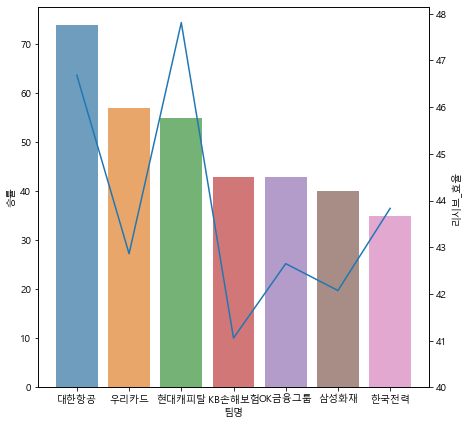

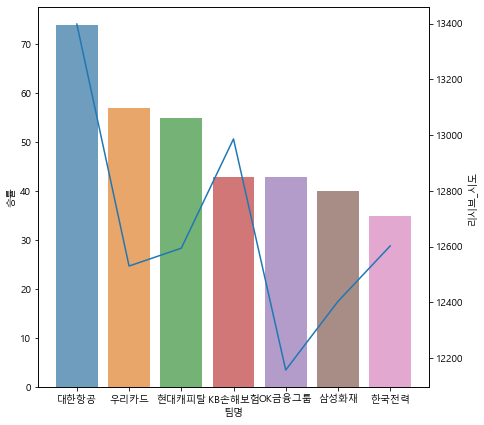

In [8]:
# 시각화 1 : 리시브와 승률의 상관관계
fig, ax = plt.subplots()
ax2 = ax.twinx()

sns.barplot(
    ax = ax,
    data = 남자팀별승률리시브효율,
    x = '팀명',
    y = '승률',
    alpha=0.7
    
)

sns.lineplot(
    ax = ax2,
    data = 남자팀별승률리시브효율,
    x = '팀명',
    y = '리시브_효율',
    palette='hls',
    
)
plt.ylim(40)
plt.show()



fig, ax = plt.subplots()
ax2 = ax.twinx()

sns.barplot(
    ax = ax,
    data = 남자팀별리시브횟수,
    x = '팀명',
    y = '승률',
    alpha=0.7
    
)

sns.lineplot(
    ax = ax2,
    data = 남자팀별리시브횟수,
    x = '팀명',
    y = '리시브_시도',
    palette='hls',
    
)
# plt.ylim(35, 50)
plt.show()

# 남자배구 공격종합 성공률 / 시도별 승률

## 시각화 전처리

In [9]:
### 공격종합 시도
# 필요한 Feature만 선택한 DF 생성
df_male_att_cnt = df_male[['팀명', '경기날짜', '결과', '공격종합_시도']]

남자팀별공격시도 = df_male_att_cnt.groupby(['팀명', '경기날짜']).mean()
# 결과 승패 1, 0으로 바꾸기
남자팀별공격시도['결과'] = 남자팀별공격시도['결과'].apply(lambda x: 1 if x != 0 else 0)

### 공격종합 성공률
df_male_att_rate = df_male[['팀명', '경기날짜', '결과', '공격종합_성공률']]

남자팀별공격성공 = df_male_att_rate.groupby(['팀명', '경기날짜']).mean()
# 결과 승패 1, 0으로 바꾸기
남자팀별공격성공['결과'] = 남자팀별공격성공['결과'].apply(lambda x: 1 if x != 0 else 0)

In [10]:
#승률 전처리
남자팀별공격시도.index = 남자팀별공격시도.index.droplevel(1)
남자팀별공격시도 = 남자팀별공격시도.reset_index()
남자팀별공격성공.index = 남자팀별공격성공.index.droplevel(1)
남자팀별공격성공 = 남자팀별공격성공.reset_index()

team_transform(남자팀별공격시도)
team_transform(남자팀별공격성공)

남자팀별공격성공시도 = 남자팀별공격시도.groupby(['팀명'])[['공격종합_시도']].sum()
남자팀별공격성공시도 = 남자팀별공격성공시도.reset_index()

남자팀별승률 = 남자팀별공격성공.groupby(['팀명'])[['승률']].mean()
남자팀별승률 = 남자팀별승률.reset_index()

남자팀별승률공격시도 = pd.merge(남자팀별승률, 남자팀별공격성공시도)
남자팀별승률공격시도.sort_values('승률',ascending=False,inplace=True)

남자팀별공격성공률 = 남자팀별공격성공.groupby(['팀명'])[['공격종합_성공률']].mean()
남자팀별공격성공률 = 남자팀별공격성공률.reset_index()

남자팀별승률공격효율 = pd.merge(남자팀별승률, 남자팀별공격성공률)
남자팀별승률공격효율.sort_values('승률',ascending=False,inplace=True)

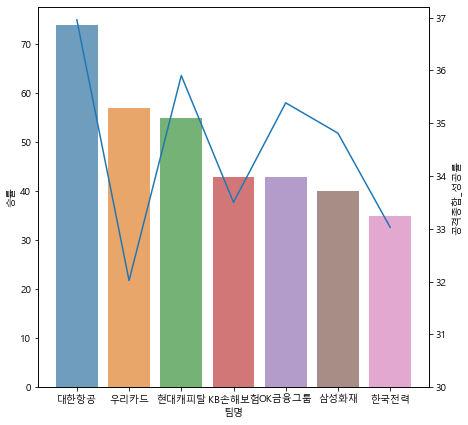

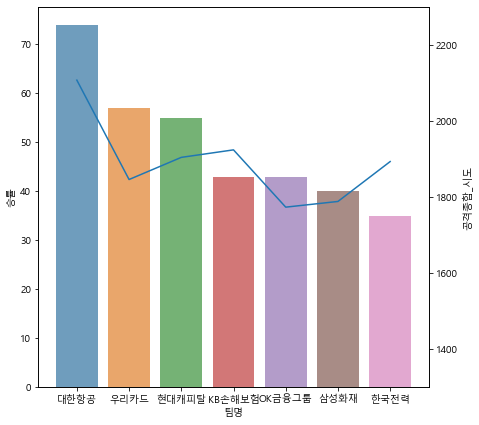

In [11]:
# 시각화 2 : 공격종합과 승률의 상관관계
fig, ax = plt.subplots()
ax2 = ax.twinx()

sns.barplot(
    ax = ax,
    data = 남자팀별승률공격효율,
    x = '팀명',
    y = '승률',
    alpha=0.7
    
)

sns.lineplot(
    ax = ax2,
    data = 남자팀별승률공격효율,
    x = '팀명',
    y = '공격종합_성공률',
    palette='hls',
    
)

plt.ylim(30)
plt.show()

fig, ax = plt.subplots()
ax2 = ax.twinx()

sns.barplot(
    ax = ax,
    data = 남자팀별승률공격시도,
    x = '팀명',
    y = '승률',
    alpha=0.7
    
)

sns.lineplot(
    ax = ax2,
    data = 남자팀별승률공격시도,
    x = '팀명',
    y = '공격종합_시도',
    palette='hls',
    
)

plt.ylim(1300, 2300)
plt.show()